In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
from src.visualization.vis_data import *
import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

Loading BokehJS ...

In [9]:
# start building dataset from scratch only perform this when new data files are added 
dataset = Dataset('Da Nang')
dataset.build_all_data( build_fire=True, build_holiday = True)

Averaging data from 1 stations
Loading all hotspots data. This might take sometimes
before drop (2454704, 18)
after drop (2371900, 10)
Getting holiday for  vietnam


# Vis Data

In [14]:
# init the data and load saved process data 
dataset = Dataset('Da Nang')
dataset.load_()
# merge pollution data with other data except fire
dataset.feature_no_fire()

data no fire has shape (29535, 14)


pollutants to plot Index(['PM2.5'], dtype='object')


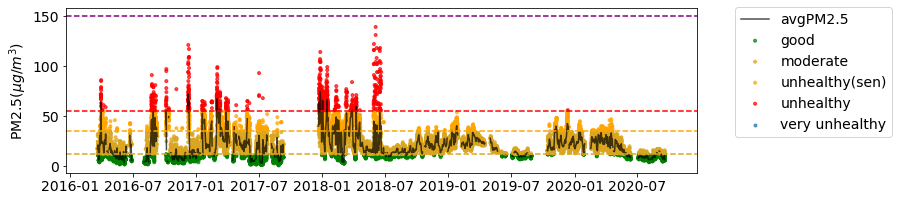

In [27]:
# plot the raw data
plot_all_pollutions(dataset.poll_df, city_name=dataset.city_name)
plt.legend(bbox_to_anchor=(1.05, 1.05) )

Text(0, 0.5, 'number of hotspots/day')

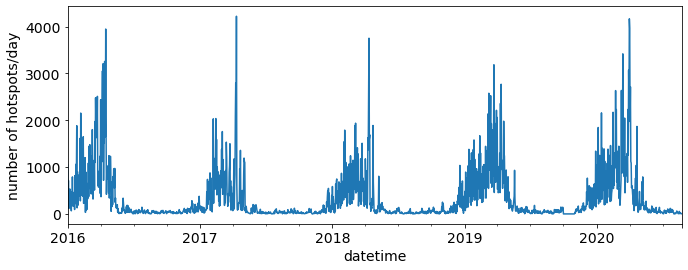

In [29]:
plt.figure(  figsize=(11, 4))
dataset.fire.resample('d').count().loc['2016':, 'count'].plot()
plt.ylabel('number of hotspots/day')

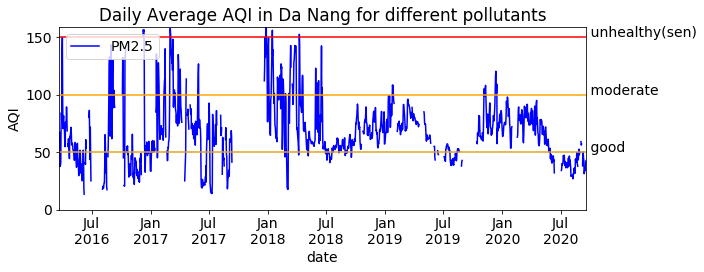

In [16]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

In [40]:
khonkaen = read_his_xl(glob('../data/aqm_hourly2/(46t)*')[0])

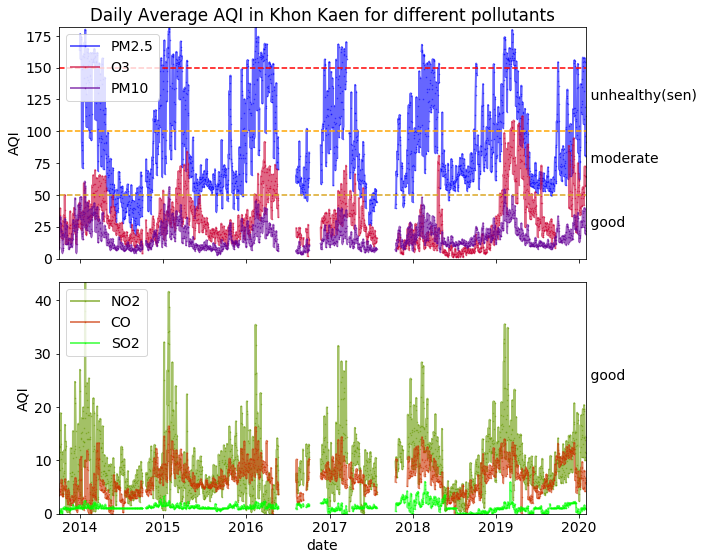

In [42]:
# compare with the data from Khon Kaen which is 600 km away
plot_polls_aqi(khonkaen.copy(), dataset.roll_dict, 'Khon Kaen')

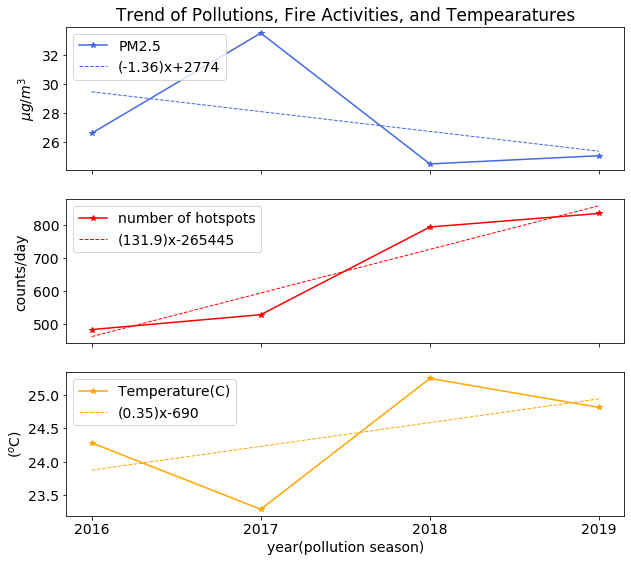

In [17]:
ax, year_avg = plot_yearly_ln(dataset, filename=dataset.report_folder + 'compare_ln_trends.png', min_year=2016)

aqi 100 in  10-06 to 04-01


(0, 155)

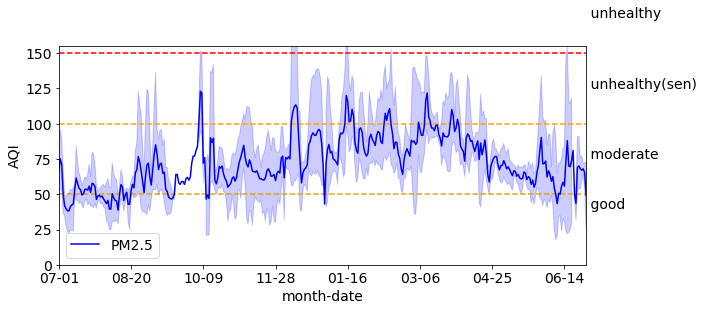

In [32]:
plot_season_aqi(dataset.poll_df.copy(), dataset.roll_dict, 'PM2.5')
plt.ylim([0, 155])
plt.savefig(dataset.report_folder + 'seasonal_pattern_PM25.png')

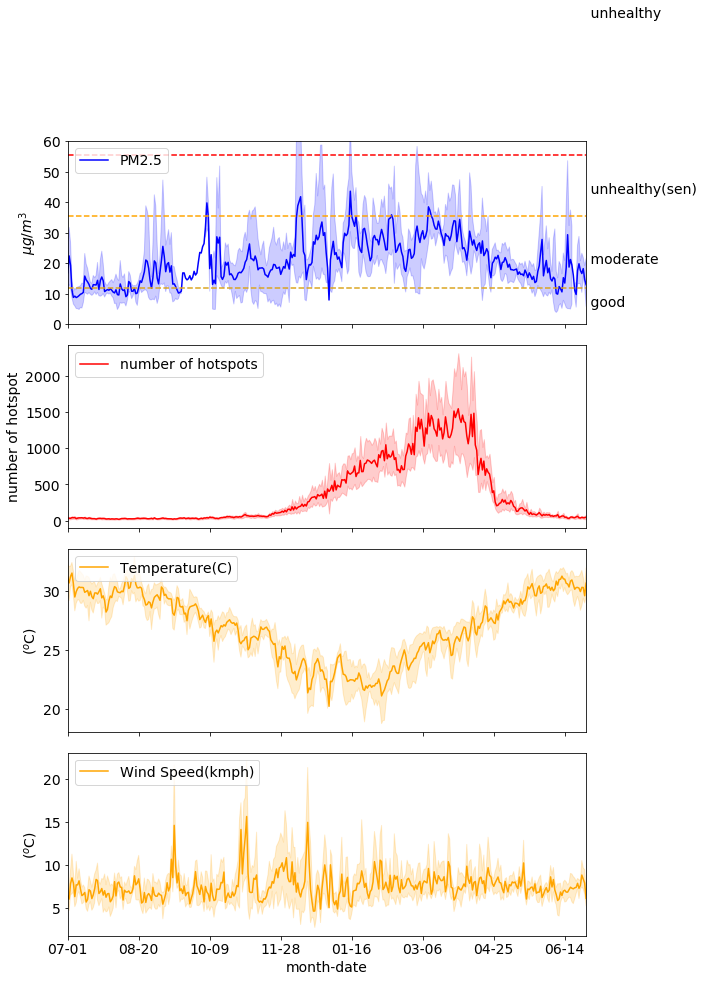

In [33]:
ax = compare_seson_avg(dataset, agg='mean')
ax[0].set_ylim([0, 60])

plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

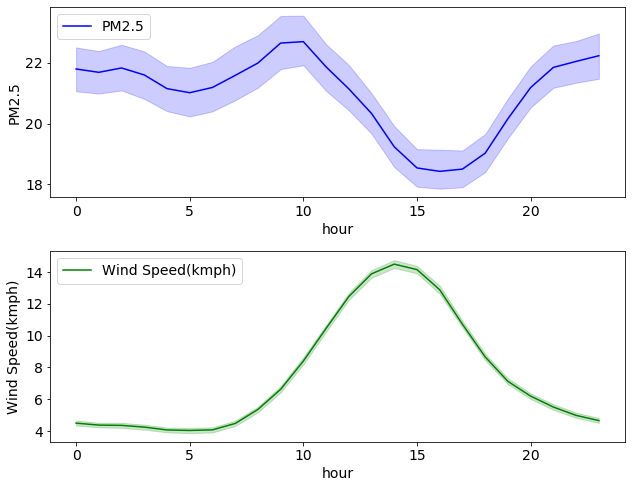

In [20]:
_, ax = plt.subplots(2, 1, figsize=(9, 7))
plot_hour_avg(dataset.poll_df.copy(), 'PM2.5', ax[0],  color='blue')
plot_hour_avg(dataset.wea.copy(), 'Wind_Speed(kmph)', ax[1],  color='green')
plt.tight_layout()

# Train Model

data no fire has shape (27894, 21)
use default fire feature
=================optimize 1: find the best RF model=================
{'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'log2', 'max_depth': 3, 'bootstrap': True} -0.020796973742546163
optimize 1 score {'val_r2_score': 0.15052903819786656, 'val_mean_squared_error': 34.56640885687354, 'val_mean_absolute_error': 4.67643538864447}
=================optimize 2: remove unncessary columns=================
old cols length 25
drop time_of_day_[21, 24)
drop fire_200_400
use columns ['Temperature(C)', 'Humidity(%)', 'Wind_Speed(kmph)', 'wind_CALM', 'wind_E', 'wind_N', 'wind_S', 'wind_W', 'is_rain', 'is_holiday', 'is_weekend', 'day_of_week', 'time_of_day_[0, 3)', 'time_of_day_[3, 6)', 'time_of_day_[6, 9)', 'time_of_day_[9, 12)', 'time_of_day_[12, 15)', 'time_of_day_[15, 18)', 'time_of_day_[18, 21)', 'fire_0_100', 'fire_100_200', 'fire_400_800', 'fire_800_1000']
score after dropping columns {'r2_score': 0.

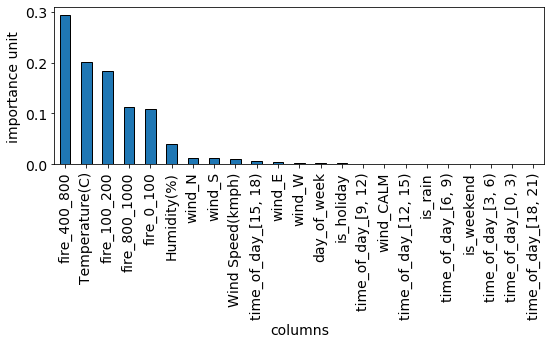

In [10]:
dataset, model, poll_meta = train_city_s1(city= 'Da Nang', pollutant='PM2.5')

In [12]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Da Nang', pollutant='PM2.5')

data no fire has shape (28859, 21)
raw model performance {'test_r2_score': 0.2464381072600269, 'test_mean_squared_error': 52.11759372131645, 'test_mean_absolute_error': 5.8793669459693705}
daily avg training error {'avg_trn_r2_score': 0.20918326026098533, 'avg_trn_mean_squared_error': 129.08085004877154, 'avg_trn_mean_absolute_error': 8.496676842725465}
daily avg test error {'avg_test_r2_score': 0.26583234651170207, 'avg_test_mean_squared_error': 45.106498798811266, 'avg_test_mean_absolute_error': 5.455516499904306}


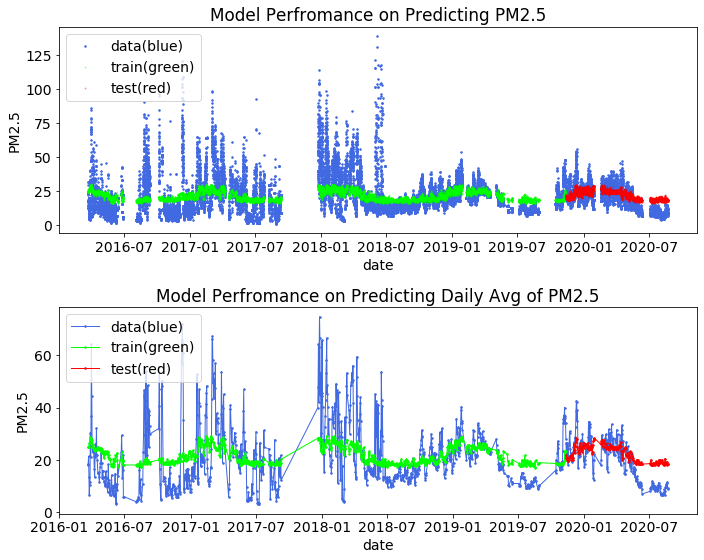

In [13]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.8, 0.2], xlim=[], to_save=True)